# LIGHTS CAMERA ACTION!
## 1. INTRODUCTION.
This project is on the type of films that are currently trending at the box office.

### 1.1 Business Understanding

Creating movies or original video content has taken the world by storm. All big companies are creating original video content and microsoft doesn't want to be left behind. The problem however is that Microsoft lacks experience in creating movies.Videos can create an instant rush of emotions.It cause us to laugh,make us feel nostalgic and has the power to bring us to tears, says one Forbes Magazine. With this in mind Microsoft create a new studio with the aim of generating unique,eye_catching video content that hooks attention immediately. They have contracted my consulting company CMK Analytics to explore what types of films are currently doing the best at the box office and turn the findings into actionable insights that the head of Microsoft's new studio can use to decide what film to create.

### 1.2 Data Understanding
the data was acquired from various locations. The different files have different formats.The data has the following set of information about the movies:
a. Principals - contains the ranks of the people who worked the movies that is whether director or writer.
b. Movie_basics - contains basic information about the movies.
c. Movie-ratings - contains movie-id ,ratings and number of reviews.
d. movies-akas - countains movie details like its title and so on and so forth.

## 2. DATA WRANGLING

### 2.1 Loading libraries & datasets

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns

In [6]:
#loading data sets
import sqlite3
conn = sqlite3.connect('Data/IM_DATABASE.db')
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor = conn.cursor()
cursor.execute(sql_query)
print("data list of tables")
print(cursor.fetchall())

data list of tables
[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [8]:
movie_basics_df = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [9]:
movie_ratings_df = pd.read_sql("SELECT * FROM movie_ratings;",conn)
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [10]:
bom_movie_gross = pd.read_csv("Data/bom.movie_gross.csv.gz")
bom_movie_gross_df = pd.DataFrame(bom_movie_gross)
movie_info = pd.read_csv("Data/rt.movie_info.tsv.gz",delimiter='\t', encoding='latin')
movie_info_df = pd.DataFrame(movie_info)
reviews = pd.read_csv("Data/rt.reviews.tsv.gz",delimiter='\t', encoding='latin')
reviews_df = pd.DataFrame(reviews)
tmdb_movies = pd.read_csv("Data/tmdb.movies.csv.gz")
tmdb_movies_df = pd.DataFrame(tmdb_movies)
movie_budgets = pd.read_csv("Data/tn.movie_budgets.csv.gz")
movie_budgets_df = pd.DataFrame(movie_budgets)

In [11]:
bom_movie_gross_df = pd.read_csv('Data/bom.movie_gross.csv.gz')
bom_movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [12]:
rt_movie_info_df = pd.read_csv('Data/tmdb.movies.csv.gz')
rt_movie_info_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [13]:
tn_movie_budgets_df = pd.read_csv('Data/tn.movie_budgets.csv.gz')
tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### 2.2 Data Analysis

In [14]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [15]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [16]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [17]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [18]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### 3.1 Data Cleaning.

In [19]:
movie_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [20]:
movie_basics_df.dropna()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [21]:
movie_ratings_df.dropna()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [22]:
bom_movie_gross_df.dropna()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [23]:
tn_movie_budgets_df = tn_movie_budgets_df.dropna()
tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [24]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace("$" ,"",regex=True).str.replace("," ,"").astype(str).astype(int)
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].str.replace("$" ,"",regex=True).str.replace("," ,"").astype(str).astype(int)
tn_movie_budgets_df = tn_movie_budgets_df.drop(columns = ['worldwide_gross'])

In [25]:
tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0
5778,79,"Apr 2, 1999",Following,6000,48482
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0


In [26]:
movie_genre_df = pd.read_sql("""SELECT genres, averagerating,numvotes
                                FROM movie_basics
                                JOIN movie_ratings
                                USING (movie_id);""", conn)
movie_genre_df

,genres,averagerating,numvotes
0,"Action,Crime,Drama",7.0,77
1,"Biography,Drama",7.2,43
2,Drama,6.9,4517
3,"Comedy,Drama",6.1,13
4,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...
73851,Documentary,6.2,6
73852,"Drama,Family",8.7,136
73853,Documentary,8.5,8
73854,None,6.6,5


In [27]:
combined_df = movie_genre_df.join(tn_movie_budgets_df)
combined_df 

,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross
0,"Action,Crime,Drama",7.0,77,1.0,"Dec 18, 2009",Avatar,425000000.0,760507625.0
1,"Biography,Drama",7.2,43,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0
2,Drama,6.9,4517,3.0,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0
3,"Comedy,Drama",6.1,13,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0
4,"Comedy,Drama,Fantasy",6.5,119,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0
...,...,...,...,...,...,...,...,...
73851,Documentary,6.2,6,NaN,NaN,NaN,NaN,NaN
73852,"Drama,Family",8.7,136,NaN,NaN,NaN,NaN,NaN
73853,Documentary,8.5,8,NaN,NaN,NaN,NaN,NaN
73854,None,6.6,5,NaN,NaN,NaN,NaN,NaN


In [28]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 385.9+ KB


In [29]:
del combined_df['id']
combined_df

,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross
0,"Action,Crime,Drama",7.0,77,"Dec 18, 2009",Avatar,425000000.0,760507625.0
1,"Biography,Drama",7.2,43,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0
2,Drama,6.9,4517,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0
3,"Comedy,Drama",6.1,13,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0
4,"Comedy,Drama,Fantasy",6.5,119,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0
...,...,...,...,...,...,...,...
73851,Documentary,6.2,6,NaN,NaN,NaN,NaN
73852,"Drama,Family",8.7,136,NaN,NaN,NaN,NaN
73853,Documentary,8.5,8,NaN,NaN,NaN,NaN
73854,None,6.6,5,NaN,NaN,NaN,NaN


In [30]:
combined_df.isnull().sum()

genres                 804
averagerating            0
numvotes                 0
release_date         68074
movie                68074
production_budget    68074
domestic_gross       68074
dtype: int64

In [31]:
combined_df1 = combined_df.dropna()
combined_df2=combined_df1.head(10)
combined_df2

,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross
0,"Action,Crime,Drama",7.0,77,"Dec 18, 2009",Avatar,425000000.0,760507625.0
1,"Biography,Drama",7.2,43,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0
2,Drama,6.9,4517,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0
3,"Comedy,Drama",6.1,13,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0
4,"Comedy,Drama,Fantasy",6.5,119,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0
5,"Horror,Thriller",4.1,32,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0
6,"Adventure,Animation,Comedy",8.1,263,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0
7,Drama,6.8,451,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0
8,History,4.6,64,"Nov 17, 2017",Justice League,300000000.0,229024295.0
9,Documentary,7.6,53,"Nov 6, 2015",Spectre,300000000.0,200074175.0


### 3.2  Data Aggregation ,Visualization and Evaluation.

#### What is the relationship between production budget and genres?

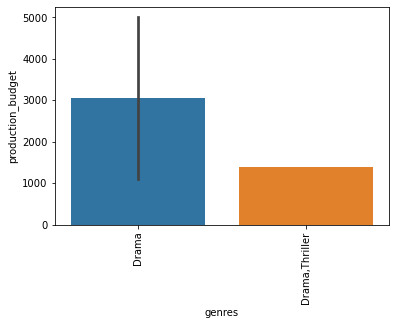

In [32]:
#find correlation between production budget and movie genre.
genre_budget = pd.DataFrame(combined_df1['genres'],combined_df1['production_budget'])
genre_budget =genre_budget.reset_index()
sns.barplot(x='genres',y='production_budget',data=genre_budget)
plt.xticks(rotation='90')
plt.show()

The Drama genre requires a lot of capital to produce followed by the Thriller genre. As shown above drama and thriller movies require a huge budget in order to ensure a good quality movie

### what is the relationship between movie genre and average rating?

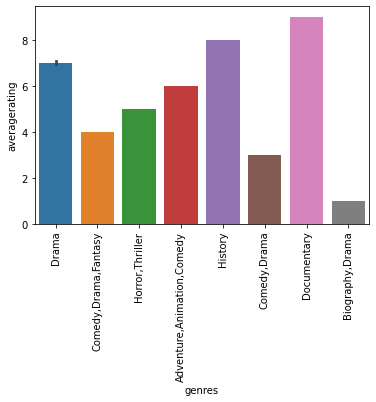

In [33]:
#find correlation between average rating and movie genre.
genre_rating = pd.DataFrame(combined_df1['genres'],combined_df1['averagerating'])
genre_rating =genre_rating.reset_index()
sns.barplot(x='genres',y='averagerating',data=genre_rating)
plt.xticks(rotation='90')
plt.show()

In [34]:
genre_rating.corr(method='pearson', min_periods =1 )

,averagerating
averagerating,1.0


In the graph above the documentary genre is performing vert well as it has the highest average ratings. This shows that there exists a  positive correlation between the gengre and the ratings.

### what is the relationship movie genres and revenue?

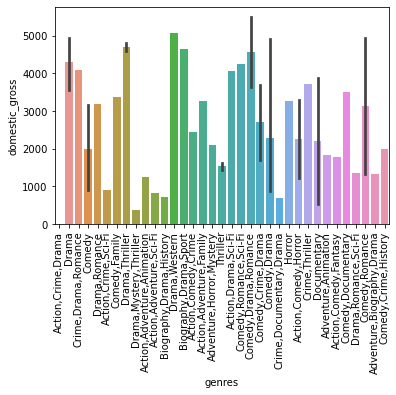

In [35]:
#find correlation between revenue and movie genre.
genre_revenue = pd.DataFrame(combined_df1['genres'],combined_df1['domestic_gross'])
genre_revenue =genre_revenue.reset_index()
sns.barplot(x='genres',y='domestic_gross',data=genre_revenue)
plt.xticks(rotation='90')
plt.show()

In [36]:
genre_revenue.corr(method='pearson', min_periods =1 )

,domestic_gross
domestic_gross,1.0


The graph above compares the genres to the domestic gross revenue. It is evident that when genres are combined in one movie the revenue generally is higher as opposed to when the movie consists of only one genre.

In [37]:
#total correlation between variables.
combined_df2.corr(method='pearson', min_periods =1 )

,averagerating,numvotes,production_budget,domestic_gross
averagerating,1.000000,0.147993,0.254941,-0.260846
numvotes,0.147993,1.000000,0.087237,-0.496475
production_budget,0.254941,0.087237,1.000000,0.017806
domestic_gross,-0.260846,-0.496475,0.017806,1.000000


There exists a positve correlation between the production budget and the average ratings.This is to mean that the more money allocated to producing the movie results in high ratings and vice versa.

### 4. Conclusion.
1. When comparing the genre and ratings the documentary genre emerged the highest.
2. The movie genre that is most costly to produce seems to be the Drama followed by the Thriller.
3. In terms of domestic revenue the findings are a lot more interesting since the movie tends to be more profitable when it consists of one or more genres.
4. I also realized that the more the money allocated to movie production the more ratings it gets.

### 5. Recommendations.
1. Drama is the best reccomended genre as according to the analysis it has the highest returns of revenue.
2. Documentaries have the highest ratings and hence means that the consumers like this type of genre.
3. Drama are the second best rated and shows also consumers appreciate the product.
4. Thrillers are also recommended for a start as they have a low cost production budget.